### Importing Libraries

In [131]:
import cv2
import numpy as np
import imageio as iio
from matplotlib import pyplot as plt

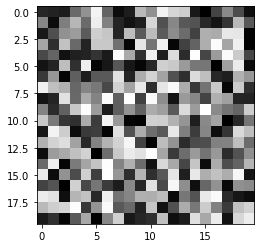

In [207]:
N = 20
img = np.random.randint(1,255,size=(N,N))
plt.imshow(img,cmap="gray");

In [204]:
def Unary(num): # 5 -> 111110
    b = []
    for i in range(num):
        b.append(1)
    b.append(0)
    return(b)
#print(Unary(5))

def binary(num,bits): # 2,5 -> 00010
    b = []
    out = bin(num)
    for i in range(bits-len(out)+2):
        b.append(0)
    for i in range(len(out)-2):
        b.append(int(out[i+2]))
    return b
#print(binary(2,5))

In [205]:
def encode(img,m=20):
    k = int(np.ceil(np.log2(m)))
    c = int(2**k-m)
    #print(m,k,c)
    #print(bin(c))
    encoded = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            numb = img[i,j]
            q = numb//m
            r = numb - q*m
            qcode = Unary(q)
            if r<c:
                rcode = binary(r,k-1)
            else :
                rcode = binary(r+c,k)
            code = qcode + rcode
            #print(q,qcode,r,rcode,code)
            encoded += code
    #print("encoded =",encoded)
    return encoded

In [206]:
def decode(x,m=20):
    k = int(np.ceil(np.log2(m)))
    c = int(2**k-m)
    img = []
    i = 0
    while i<len(x):
        #print(x[i],end='')
        q = 0
        while x[i+q]==1:
            q+=1
        i+=q+1
        if x[i:i+k-1]<binary(c,k-1):
            #print(q,x[i:i+k-1])
            r = num(x[i:i+k-1])
            i+=k-1
        else :
            #print(q,x[i:i+k])
            r = num(x[i:i+k])-c
            i+=k
        #print(q,r)
        img.append(q*m+r)
    return np.array(img)

def num(listt): #[0,0,1,0] -> 2
    out = 0
    for i in range(len(listt)):
        out+=listt[len(listt)-1-i]*2**i
    return out

In [215]:
m = int(np.random.randint(4,255,size=1))
encoded = encode(img,m)
output = decode(encoded,m).reshape((N,N))
print("m =",m,"Lostless :",(sum(sum(output-img)))==0)

m = 58 Lostless : True


In [216]:
bits = np.zeros((18,10))
least = np.zeros(18)
for i in range(18):
    for j in range(10):
        N = 20+j*7
        img = np.random.randint(1,255,size=(N,N))
        m = 7*i+60
        encoded = encode(img,m)
        bits[i,j] = len(encoded)/N**2
        #print(m,len(encoded),8*N**2)
        output = decode(encoded,m).reshape((N,N));
        print(sum(sum(output-img)),end='')
    k = np.argmin(bits[i])
    least[i] = bits[i,k]
    print(" at N =",k*7+20,"needed bits per pixel :",bits[i,k])
print()
#print(bits)
k = np.argmin(least)
print("best m =",k*7+60,"lowest bits needed per pixel :",least[k])

0000000000 at N = 34 needed bits per pixel : 8.544117647058824
0000000000 at N = 41 needed bits per pixel : 8.479476502082093
0000000000 at N = 48 needed bits per pixel : 8.477864583333334
0000000000 at N = 41 needed bits per pixel : 8.440214158239144
0000000000 at N = 20 needed bits per pixel : 8.4575
0000000000 at N = 34 needed bits per pixel : 8.479238754325259
0000000000 at N = 27 needed bits per pixel : 8.45679012345679
0000000000 at N = 20 needed bits per pixel : 8.465
0000000000 at N = 20 needed bits per pixel : 8.4725
0000000000 at N = 34 needed bits per pixel : 8.475778546712803
0000000000 at N = 48 needed bits per pixel : 8.48828125
0000000000 at N = 20 needed bits per pixel : 8.5125
0000000000 at N = 20 needed bits per pixel : 8.5475
0000000000 at N = 76 needed bits per pixel : 8.573580332409973
0000000000 at N = 34 needed bits per pixel : 8.589965397923875
0000000000 at N = 83 needed bits per pixel : 8.64407025693134
0000000000 at N = 20 needed bits per pixel : 8.655
000000